In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = (r"C:\Users\akash\Desktop\Random Forest classifier\Dataset\employee_attrition_rf_dataset.csv")
employee_attrition = pd.read_csv(url)

In [3]:
employee_attrition.head()

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,NumCompaniesWorked,TrainingTimes,Attrition
0,25,76980,16,3,3,Yes,5,2,No
1,40,62683,4,4,2,No,0,1,No
2,21,39353,16,2,2,No,7,4,No
3,35,17245,16,1,1,Yes,2,2,No
4,23,40661,5,3,3,Yes,4,2,Yes


In [4]:
employee_attrition.isnull().sum()

Age                   0
MonthlyIncome         0
YearsAtCompany        0
JobSatisfaction       0
WorkLifeBalance       0
OverTime              0
NumCompaniesWorked    0
TrainingTimes         0
Attrition             0
dtype: int64

In [5]:
x = employee_attrition[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance', 'OverTime', 'NumCompaniesWorked', 'TrainingTimes']]
y = employee_attrition['Attrition']

In [6]:
x.head()

,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,NumCompaniesWorked,TrainingTimes
0,25,76980,16,3,3,Yes,5,2
1,40,62683,4,4,2,No,0,1
2,21,39353,16,2,2,No,7,4
3,35,17245,16,1,1,Yes,2,2
4,23,40661,5,3,3,Yes,4,2


In [7]:
le = LabelEncoder()
x.loc[:, 'OverTime'] = le.fit_transform(x['OverTime'])

In [8]:
x.loc[:, 'OverTime'].fillna(x['OverTime'].median(), inplace=True)

In [9]:
employee_attrition.isnull().sum()

Age                   0
MonthlyIncome         0
YearsAtCompany        0
JobSatisfaction       0
WorkLifeBalance       0
OverTime              0
NumCompaniesWorked    0
TrainingTimes         0
Attrition             0
dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [12]:
print(len(rf_classifier.estimators_))
tree = rf_classifier.estimators_[0]
print(tree)

100
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


In [13]:
print(rf_classifier.feature_importances_)

[0.18654895 0.23210932 0.19154552 0.06854397 0.06357543 0.03383778
 0.12360132 0.10023772]


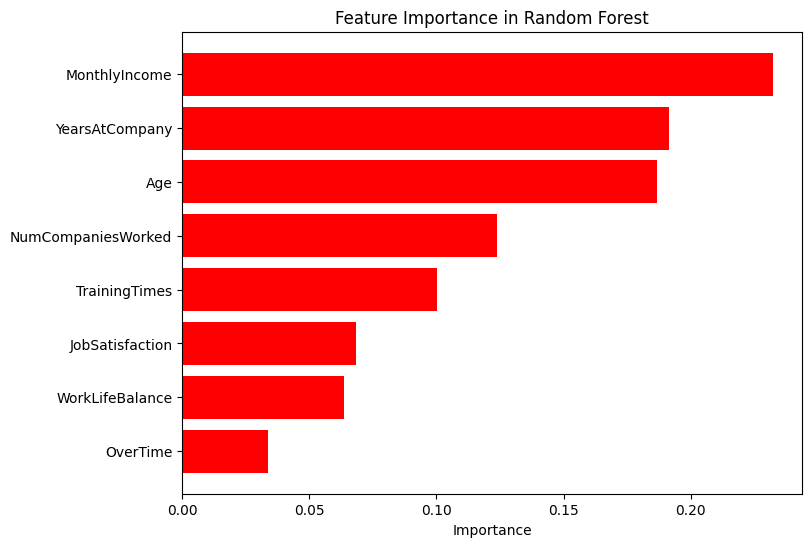

In [14]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
feature_names = x.columns

# Create a DataFrame for better visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='red')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [15]:
feat_imp.head()

,Feature,Importance
1,MonthlyIncome,0.232109
2,YearsAtCompany,0.191546
0,Age,0.186549
6,NumCompaniesWorked,0.123601
7,TrainingTimes,0.100238


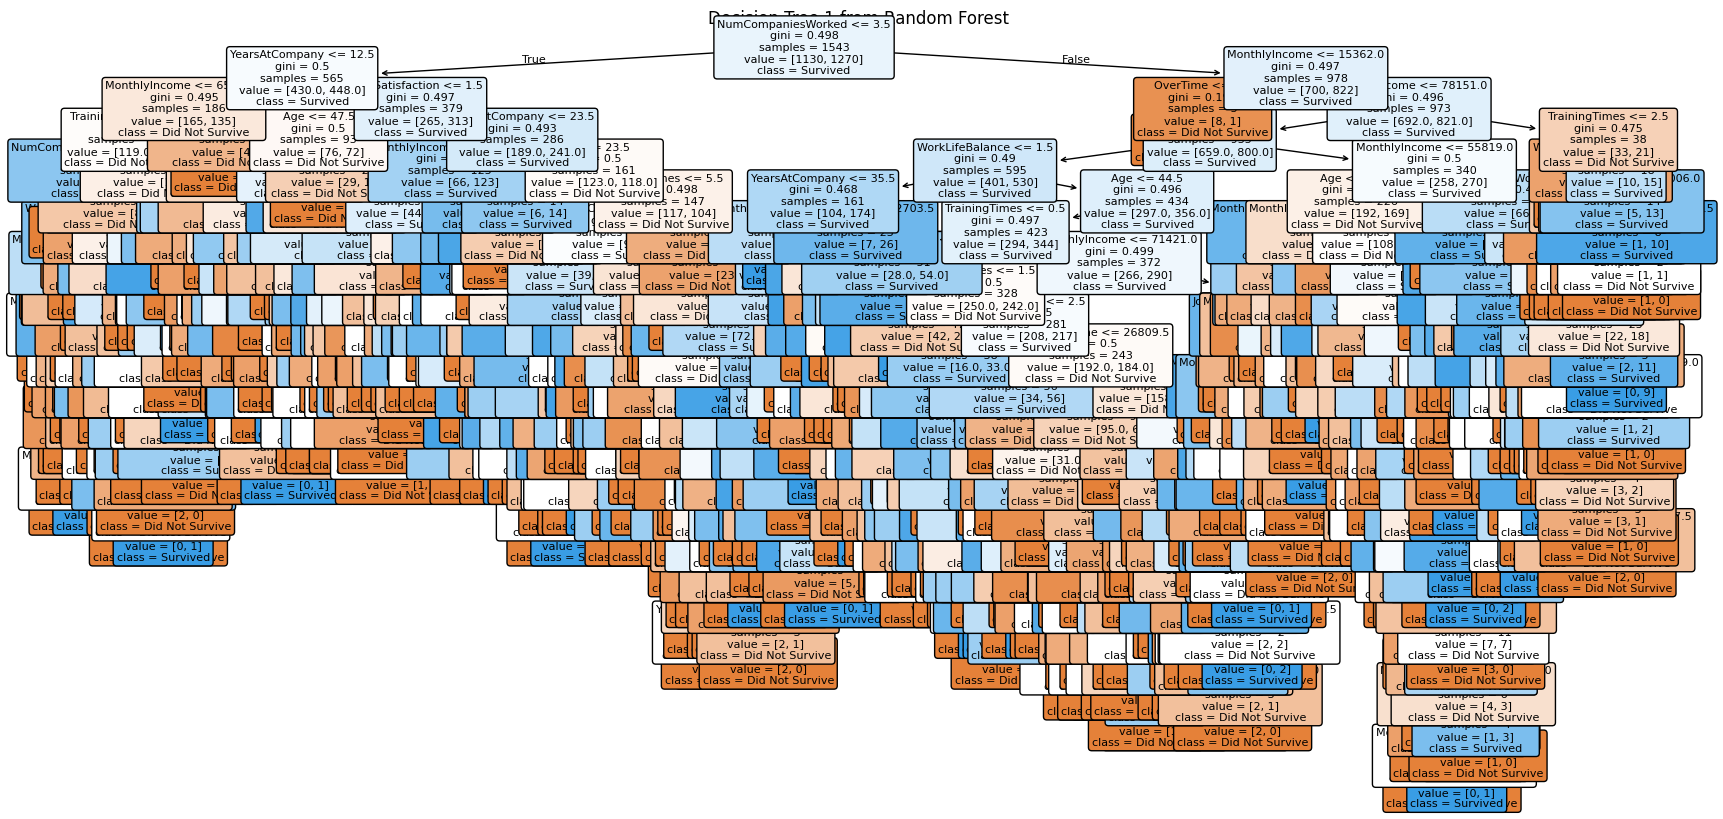

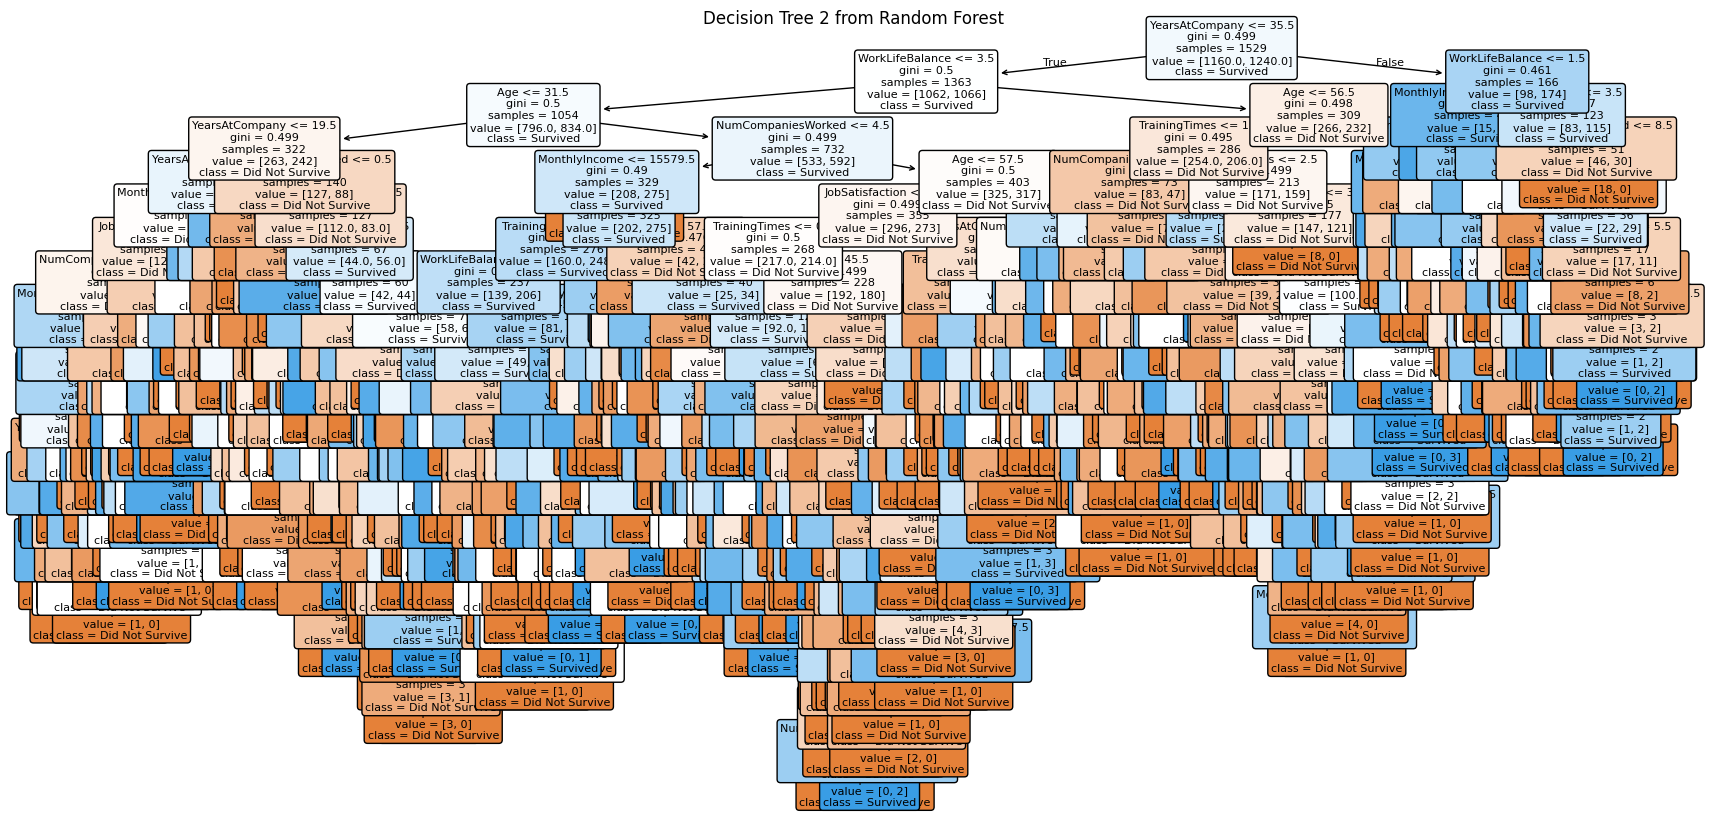

In [16]:
from sklearn.tree import plot_tree

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=x.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 1 from Random Forest")
plt.show()

# Plot the second tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[1], 
          feature_names=x.columns, 
          class_names=['Did Not Survive', 'Survived'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 2 from Random Forest")
plt.show()


In [17]:
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = x_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

          No       0.54      0.46      0.50       311
         Yes       0.50      0.58      0.54       289

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600


Sample Passenger: {'Age': 36, 'MonthlyIncome': 31296, 'YearsAtCompany': 16, 'JobSatisfaction': 3, 'WorkLifeBalance': 1, 'OverTime': 1, 'NumCompaniesWorked': 4, 'TrainingTimes': 4}
Predicted Survival: Did Not Survive


In [18]:
sample.to_dict()

{'Age': {1801: 36},
 'MonthlyIncome': {1801: 31296},
 'YearsAtCompany': {1801: 16},
 'JobSatisfaction': {1801: 3},
 'WorkLifeBalance': {1801: 1},
 'OverTime': {1801: 1},
 'NumCompaniesWorked': {1801: 4},
 'TrainingTimes': {1801: 4}}

In [19]:
sample_dict_sam = sample.to_dict()
print(sample_dict_sam)

{'Age': {1801: 36}, 'MonthlyIncome': {1801: 31296}, 'YearsAtCompany': {1801: 16}, 'JobSatisfaction': {1801: 3}, 'WorkLifeBalance': {1801: 1}, 'OverTime': {1801: 1}, 'NumCompaniesWorked': {1801: 4}, 'TrainingTimes': {1801: 4}}


In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bagging_pred))

Bagging Classifier Accuracy: 0.54


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), #week learner
    n_estimators=100, # number of week learner
    learning_rate=0.1, # step size
    random_state=42
)
# Train the model
adaboost_model.fit(x_train, y_train)
#adaboost_pred = adaboost_model.predict(X_test)
#print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, adaboost_pred))

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeC...r(max_depth=1)
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",100
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None


In [22]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [23]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5233333333333333


In [24]:
import joblib
joblib.dump(model, "random_forest_attrition_model.pkl")
print("Model saved successfully")


Model saved successfully
